# Credit Card Fraud Detection

In [1]:
%pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 288.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

from ..src.dataloading.read_dataset import readData
from ..src.features.data_preprocessing import preprocessData
from ..src.visualization.visualize import visualizeData, DisplayCallback
from ..src.modules.build_model import buildModel
from ..src.modules.train_model import  trainModel
from ..src.modules.predict_model import predictor
from ..src.hyper_parameters.hps import get_hyper_paras
from ..src.github_commands.git_utils import gitCommands


ImportError: attempted relative import with no known parent package

In [15]:
# import zipfile
# with zipfile.ZipFile('../data/creditcard.csv.zip', 'r') as zip_ref:
#     zip_ref.extractall('../data/')

In [16]:
data=pd.read_csv("../data/creditcard.csv")

In [17]:
data.shape

(284807, 31)

In [18]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Let see how features are distributed w.r.t., our target variable, which is "Class".

/opt/app-root/lib64/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/app-root/lib64/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/app-root/lib64/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/app-root/lib64/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is 

<Figure size 432x288 with 0 Axes>

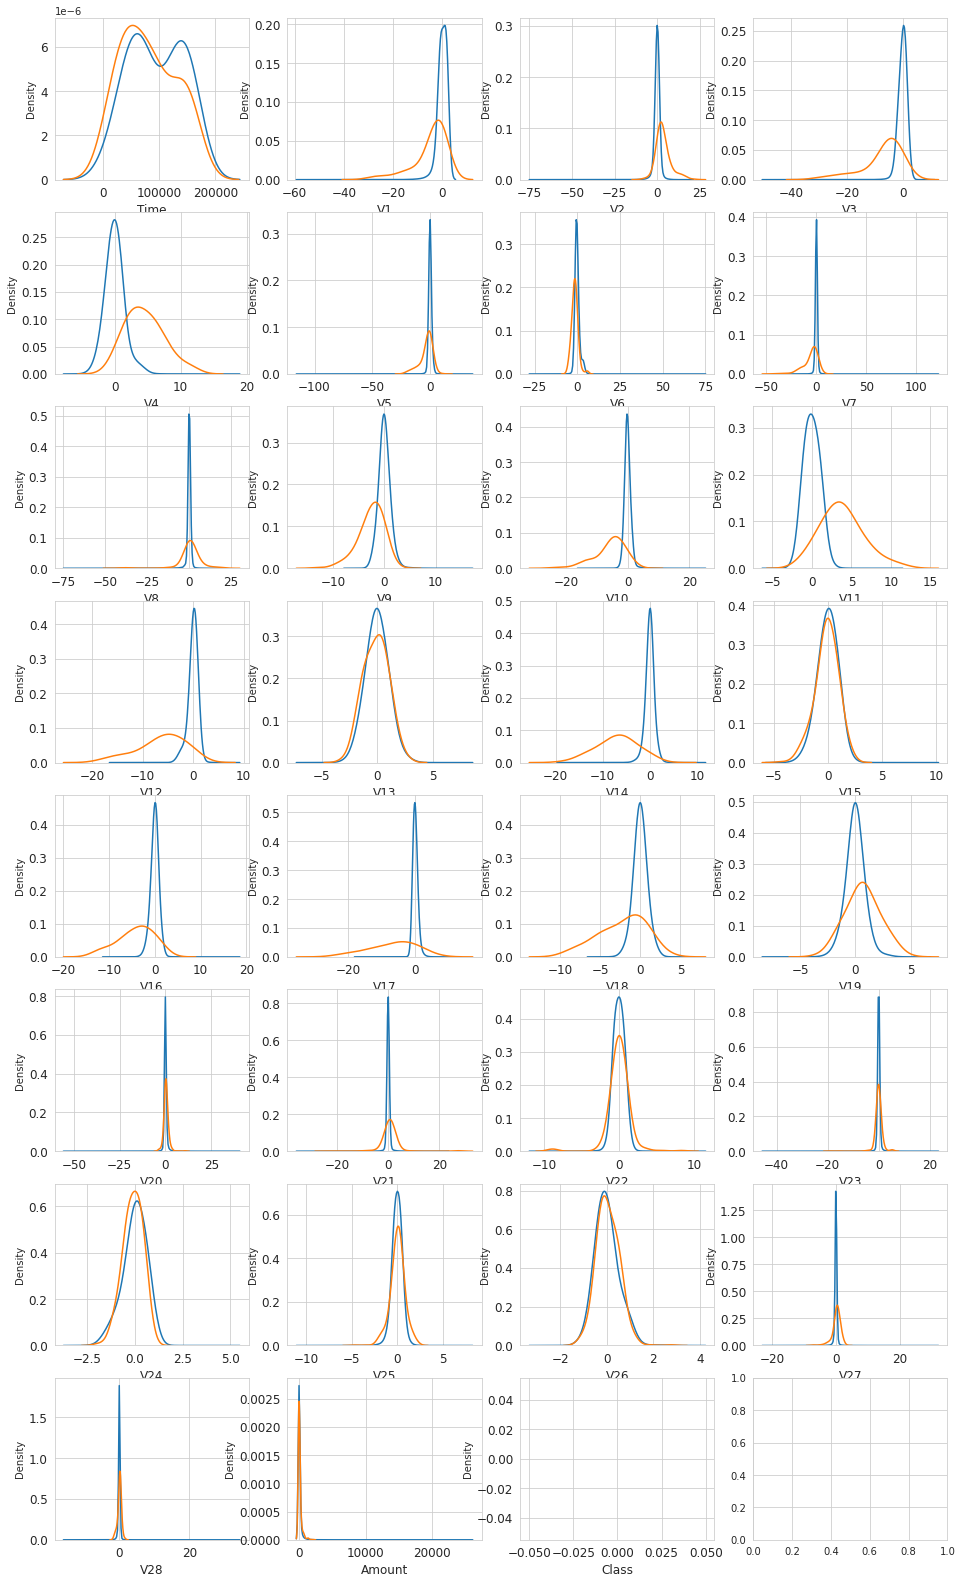

In [21]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

To work with this dataset, we need to bring all the variables in the same scale. But before that we will do a little more exploration.

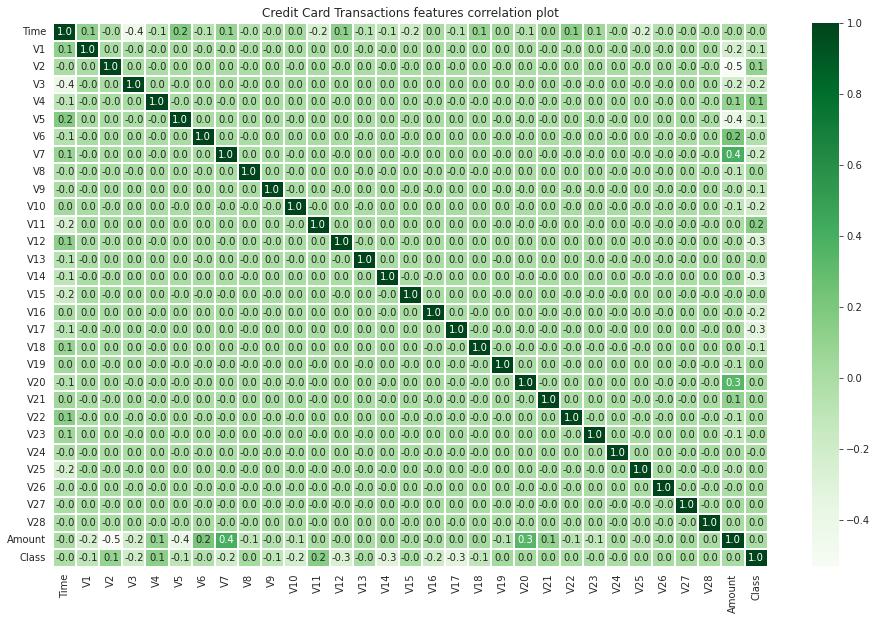

In [22]:
plt.figure(figsize = (16,10))
plt.title('Credit Card Transactions features correlation plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens",fmt='.1f',annot=True)
plt.show()

Our data is pretty imbalanced as can be seen just below.

Text(0.5, 0, 'Target Labels')

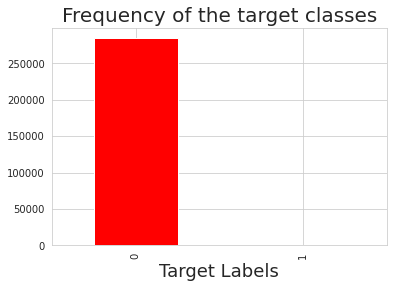

In [23]:
data["Class"].value_counts().plot(kind="bar",color="red")
plt.title("Frequency of the target classes", size=20)
plt.xlabel("Target Labels", size = 18)

Below is the exact frequency values for both the target labels.

In [24]:
target = pd.DataFrame(data["Class"].value_counts())
target.style.background_gradient(cmap="Reds")

,Class
0,284315
1,492


In [81]:
target.iloc[1].values[0]

492

In [83]:
# counts = np.bincount(target[:, 0])
# print(
#     "Number of positive samples in training data: {} ({:.2f}% of total)".format(
#         counts[1], 100 * float(counts[1]) / len(train_targets)
#     )
# )

weight_for_0 = (1.0 / target.iloc[0].values[0])
weight_for_1 = (1.0 / target.iloc[1].values[0])*100


Now we will try to standardize all our input features and for that we will seperate the input from the output feature, so that it will be easy for us.

In [25]:
X=data.drop(columns=["Class"])
y=data["Class"]

In [26]:
names=X.columns
scaled_df = preprocessing.scale(X)
scaled_df = pd.DataFrame(scaled_df,columns=names)

In [27]:
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


So by seeing the time and amount features, we can say that the features has been scaled.

In [28]:
scaled_df[["Amount","Time"]].describe()

,Amount,Time
count,2.848070e+05,2.848070e+05
mean,2.913952e-17,-3.065637e-16
std,1.000002e+00,1.000002e+00
min,-3.532294e-01,-1.996583e+00
25%,-3.308401e-01,-8.552120e-01
50%,-2.652715e-01,-2.131453e-01
75%,-4.471707e-02,9.372174e-01
max,1.023622e+02,1.642058e+00


As here we are dealing with the problem of imbalanced dataset, so we will try to balance it using a technique called "**SMOTE**" which is the short form of **Synthetic Minority Over-sampling Technique**, this is another method of simple over-sampling technique, but here instead of just duplicating the minority the class, synthetic data are produced, so according to me it is much better compared to simple over-sampling, which just randomly duplicates the minority class to balance it. There is another method, by which we can solve this problem of unbalaced data, which is "Down-Sampling", but I am not a big fan of that technique cause there is a lot of data loss which happens while trying to achieve that.


# Splitting the Data


Now we will split the standardized dataset into train and test, and then do over-sampling on the training dataset, and then we will do the classification based on the training.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = 0.30, random_state = 0, shuffle = True, stratify = y)

In [30]:
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

Also let's check a few thing about the splitted data before we proceed.

In [31]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [32]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

# SMOTE


Now we will start the process.

In [36]:
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

Now we will see whether it has been balanced or not.

<AxesSubplot:>

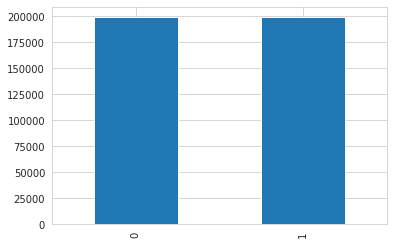

In [37]:
pd.Series(y_train_new).value_counts().plot(kind="bar")

So it is pretty much balanced now, and we can build our predictive model with it now.

# Using Logistic Regression

In [38]:
clf = LogisticRegression(solver = 'lbfgs')
clf.fit(X_train_new, y_train_new)
train_pred = clf.predict(X_train_new)
test_pred = clf.predict(X_test)

In [39]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9502788664455833
Accuracy score for Testing Dataset =  0.9762297672132298


In [40]:
cm=confusion_matrix(y_test, test_pred)
cm

array([[83277,  2018],
       [   13,   135]])

# Confusion Matrix for Logistic Regression Model

Text(0.5, 1.0, 'Confusion Matrix Plotting for Logistic Regression model')

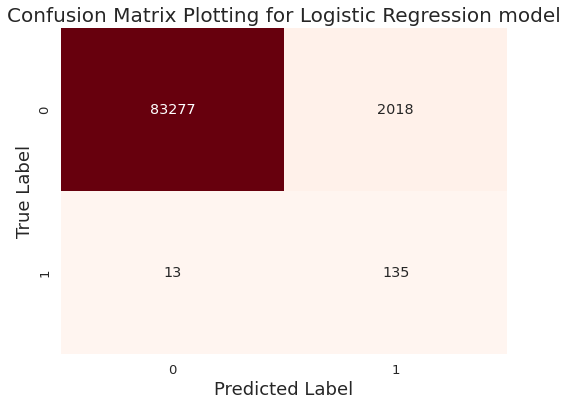

In [41]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("Predicted Label", size = 18)
plt.ylabel("True Label", size = 18)
plt.title("Confusion Matrix Plotting for Logistic Regression model", size = 20)

So from the above confusion matrix, we can see that the nummber of wrong classifications done for 0, which is "no fraud" is 2018 out of 85295, and number of wrong classification done for 1, which is "Fraud happened" is 13 out of 148, or in terms of percentages, let's see below.

In [42]:
print("Percentage for 'no fraud' cases wrong classification using Logistic Regression is:", (2018/85295)*100)
print("Percentage for 'Fraud' cases wrong prediction Logistic Regression is:", (13/148)*100)

Percentage for 'no fraud' cases wrong classification using Logistic Regression is: 2.3659065595873146
Percentage for 'Fraud' cases wrong prediction Logistic Regression is: 8.783783783783784


# Using Neural Network

# Model Architecture

In [84]:
model = Sequential()
model.add(Dense(X_train_new.shape[1], activation = 'relu', input_dim = X_train_new.shape[1]))
model.add(BatchNormalization())


model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [97]:


model = Sequential([
    Dense(units=128, kernel_initializer='uniform', input_dim=X_train_new.shape[1], activation='relu'),
    Dense(units=18, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dense(24, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])



The hyperparameters that we have used here are **Batch Normalization**, and **Dropout**. And the activation function we have used here for hidden layers are "relu", and for output, it is "Sigmoid" function.

Now let's compile the model.

In [98]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]
optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer = optimizer, loss = 'binary_focal_crossentropy',metrics=metrics)

/opt/app-root/lib64/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


To protect our model from overfitting, we will use early stop feature of tensorflow, which will once identify that the evaluation metric that we mentioned, if it stopped improving further, it will stop the number of epochs.

In [99]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
class_weight = {0: weight_for_0, 1: weight_for_1}#

In [100]:
history = model.fit(x=X_train_new, y=y_train_new, batch_size = 256, epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop],class_weight=class_weight)

Epoch 1/150
1555/1555 [==============================] - 5s 2ms/step - loss: 0.0032 - fn: 130.0000 - fp: 198935.0000 - tn: 85.0000 - tp: 198890.0000 - precision: 0.4999 - recall: 0.9993 - val_loss: 1.0121 - val_fn: 0.0000e+00 - val_fp: 85295.0000 - val_tn: 0.0000e+00 - val_tp: 148.0000 - val_precision: 0.0017 - val_recall: 1.0000
Epoch 2/150
1555/1555 [==============================] - 3s 2ms/step - loss: 1.3001e-05 - fn: 0.0000e+00 - fp: 199020.0000 - tn: 0.0000e+00 - tp: 199020.0000 - precision: 0.5000 - recall: 1.0000 - val_loss: 1.7888 - val_fn: 0.0000e+00 - val_fp: 85295.0000 - val_tn: 0.0000e+00 - val_tp: 148.0000 - val_precision: 0.0017 - val_recall: 1.0000
Epoch 3/150
1555/1555 [==============================] - 3s 2ms/step - loss: 5.2273e-06 - fn: 0.0000e+00 - fp: 199020.0000 - tn: 0.0000e+00 - tp: 199020.0000 - precision: 0.5000 - recall: 1.0000 - val_loss: 2.0823 - val_fn: 0.0000e+00 - val_fp: 85295.0000 - val_tn: 0.0000e+00 - val_tp: 148.0000 - val_precision: 0.0017 - val_r

Text(0.5, 1.0, 'Loss for both Training and Validation')

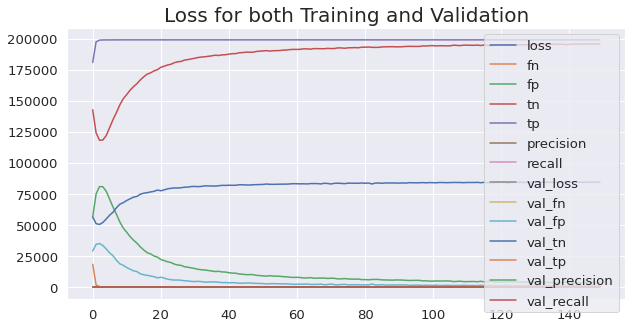

In [80]:
evaluation_metrics=pd.DataFrame(model.history.history)
evaluation_metrics.plot(figsize=(10,5))
plt.title("Loss for both Training and Validation", size = 20)

In [94]:

# y_pred = model.predict_classes(X_test)
import numpy as np
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

In [95]:
cm_nn=confusion_matrix(y_test, y_pred)
cm_nn

array([[85295,     0],
       [  148,     0]])

# Confusion Matrix for Neural Network

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network model')

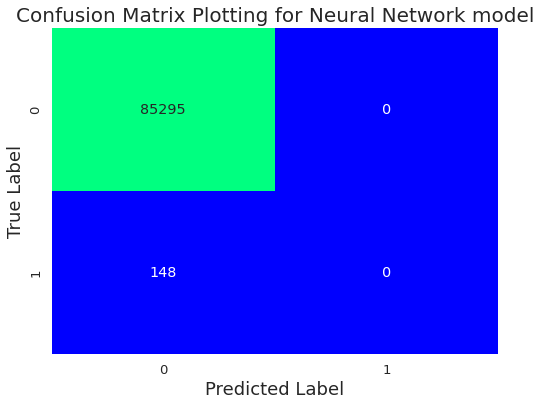

In [96]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm_nn, annot=True, fmt = 'g', cmap="winter", cbar = False)
plt.xlabel("Predicted Label", size = 18)
plt.ylabel("True Label", size = 18)
plt.title("Confusion Matrix Plotting for Neural Network model", size = 20)

So if we compare this with the Logistic Regression model, the little problem here is that, it is doing very good prediction for the majority class, which is 0 or "**No Fraud**" cases, but for minority class, which is 1 or "**Fraud**" cases, it is performing a little less better than the Logistic Regression. But I guess with a little more hyperparamters tuning, the model will be able to perform better than the Logistic Regression even for **minority class**.